## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("IRIS_Flower_Classification.csv")

In [3]:
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Analyzing the data

<Axes: xlabel='Sepal Length', ylabel='Frequency'>

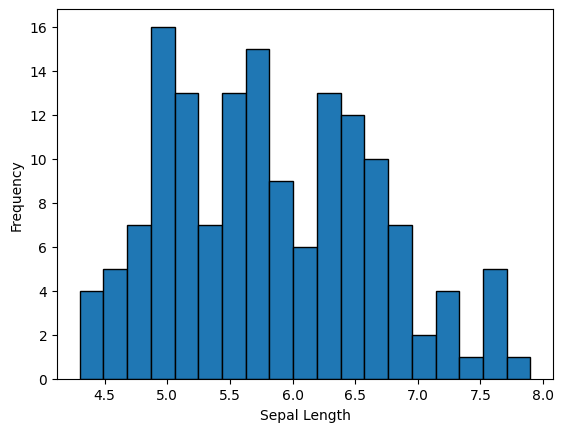

In [7]:
df['sepal_length'].plot(kind = "hist", bins = 19, xlabel = "Sepal Length", edgecolor = "black")

<Axes: xlabel='Sepal Width', ylabel='Frequency'>

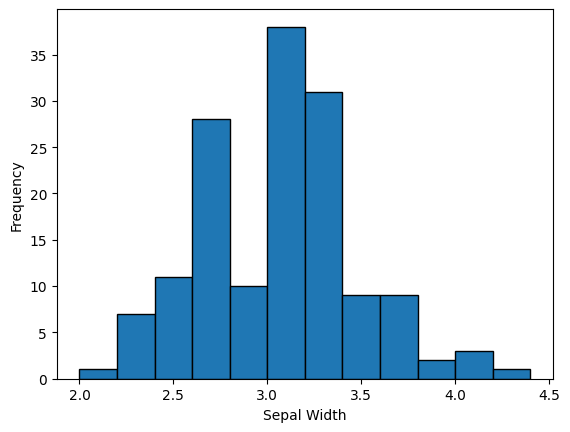

In [8]:
df['sepal_width'].plot(kind = "hist", bins = 12, xlabel = "Sepal Width", edgecolor = "black")

<Axes: xlabel='Petal Length', ylabel='Frequency'>

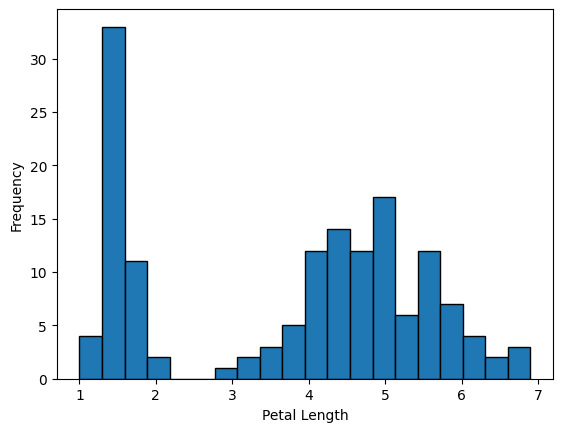

In [9]:
df['petal_length'].plot(kind = "hist", bins = 20, xlabel = "Petal Length", edgecolor = "black")

<Axes: xlabel='Petal Width', ylabel='Frequency'>

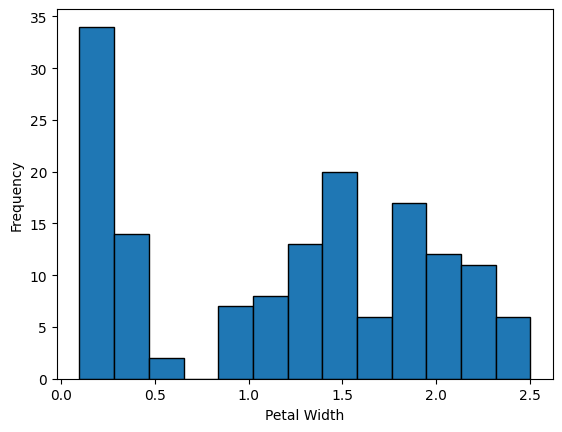

In [10]:
df['petal_width'].plot(kind = "hist", bins = 13, xlabel = "Petal Width", edgecolor = "black")

In [11]:
colors = ["#FFBA49", "#20A39E", "#EF5B5B"]
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

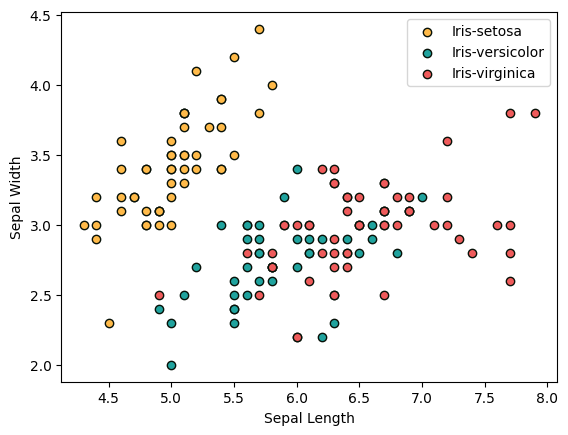

In [12]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label = species[i], edgecolors = "#071108")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

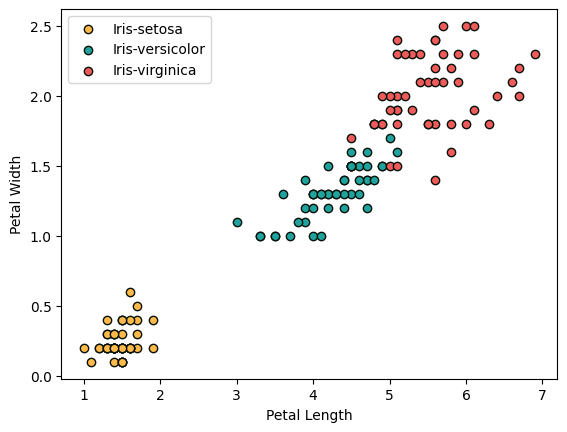

In [13]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label = species[i], edgecolors = "#071108")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

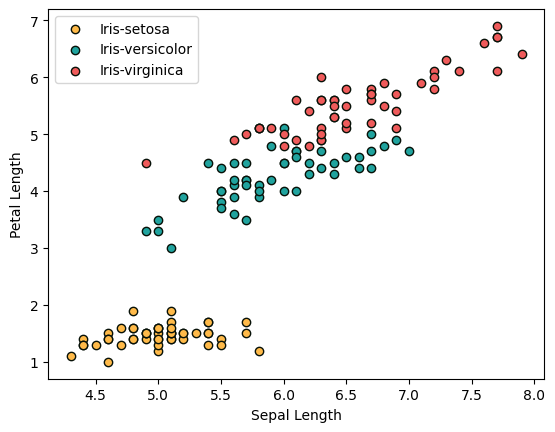

In [14]:
for i in range(3):
    x=df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label = species[i], edgecolors = "#071108")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

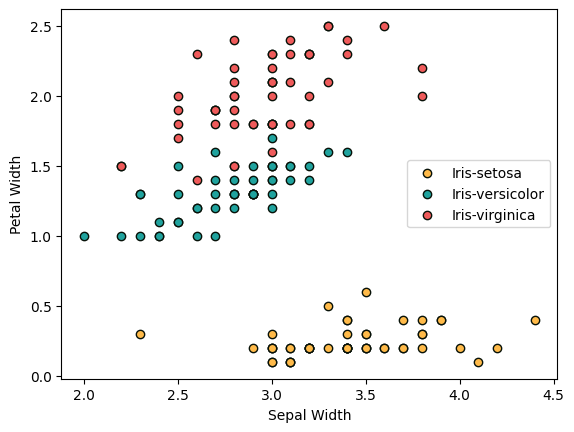

In [15]:
for i in range(3):
    x=df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label = species[i], edgecolors = "#071108")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

<Axes: >

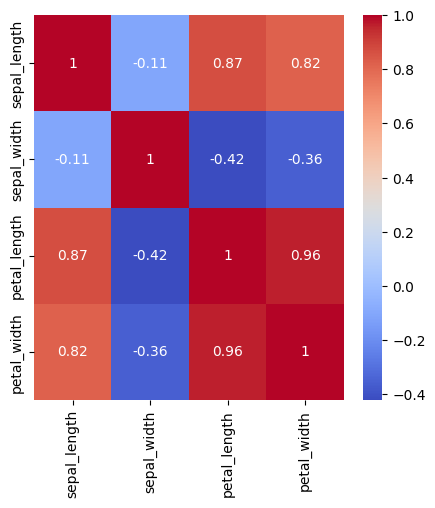

In [16]:
num_columns = df.drop(columns = "species")
corr = num_columns.corr()
fig, axis = plt.subplots(figsize = (5, 5))
sns.heatmap(corr, annot = True, ax = axis, cmap = "coolwarm")

In [17]:
le = LabelEncoder()

In [18]:
df["species"] = le.fit_transform(df["species"])

In [19]:
x = df.drop(columns = "species")

In [20]:
y = df["species"]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(x_train, y_train)

LogisticRegression()

In [24]:
knn = KNeighborsClassifier()

In [25]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [26]:
dt = DecisionTreeClassifier()

In [27]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
lr_accuracy = lr.score(x_test, y_test)*100
knn_accuracy = knn.score(x_test, y_test)*100
dt_accuracy = dt.score(x_test, y_test)*100

In [29]:
print(f"Accuracy by using Logistic Regression: {lr_accuracy:.2f}%")
print(f"Accuracy by using KNN Algorithm: {knn_accuracy:.2f}%")
print(f"Accuracy by using Decision Tree Classifier: {dt_accuracy:.2f}%")

Accuracy by using Logistic Regression: 93.33%
Accuracy by using KNN Algorithm: 93.33%
Accuracy by using Decision Tree Classifier: 91.11%
